# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo. 

Se usan herramientas como matrices de dispersión, matrices de correlación, diagramas de dispersió, histogramas, diccionarios. 

## Inicialización

In [ ]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


### Cargar datos

In [ ]:
# Carga el archivo de datos en un DataFrame

data= pd.read_csv('/datasets/vehicles_us.csv')

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina



In [ ]:
# imprime la información general/resumida sobre el DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
# imprimir una muestra de datos
data.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


Hay 5 columnas donde existen valores ausentes. Se deben tratar para ver si son aleatorios o siguen algun patron.

Las columnas model_year, cylinders y is_4wd tienen valores tipo float cuando deberían ser int y date_posted debe ser cambiado de object a tipo fecha. 

La columna con mas valores ausentes es la de is_4wd que se refiere a si tiene tracción en las 4 ruedas. 

In [ ]:
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>
    
Correcto
</div> 

### Conclusiones y siguientes pasos

Empezaré a analizar los datos de la columna is_4wd ya que solo son dos valores los que puede tomar: 1 o 0. Después veré si existe algún patron en las demás columnas que contienen valores ausentes. 

## Tratar los valores ausentes (si hay)

**Valores ausentes de la columna is_4wd**

In [ ]:
data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

Todos los valores no nulos de esta columna son 1, cambiaré los valores ausentes por 0.

In [ ]:
#Se rellenan todos los valores ausentes con 0
data['is_4wd']=data['is_4wd'].fillna(0)

In [ ]:
#Se convierten a enteros
data['is_4wd']=data['is_4wd'].astype(int)
data['is_4wd'].dtypes

dtype('int64')

In [ ]:
#Se comprueban los valores
data['is_4wd'].unique()

array([1, 0])

In [ ]:
#Se comprueba que ya no existan valores ausentes
data['is_4wd'].isna().sum()

0

**Ahora trabajaré con los valores ausentes de la columna model_year**

In [ ]:
#Voy a sacar la media del año de cada modelo. Transformaré los datos en enteros ya que el año del modelo no puede estar en decimal.

datos_model_pivot=data.pivot_table(index='model', values='model_year', aggfunc='median').astype(int)
datos_model_pivot

,model_year
model,
acura tl,2007
bmw x5,2010
buick enclave,2012
cadillac escalade,2009
chevrolet camaro,2013
...,...
toyota sienna,2008
toyota tacoma,2010
toyota tundra,2009


In [ ]:
# Creando una función para rellenar los valores ausentes

def model_year(row):
    model = row['model']
    model_year = row['model_year']
    
    if pd.isna(model_year):
        return datos_model_pivot['model_year'][model]
    return model_year

In [ ]:
#Vamos a probar si funciona la función

row_values = [np.nan, "bmw x5"]
row_columns = ['model_year', 'model']
row = pd.Series(data=row_values, index=row_columns)
model_year(row) 

2010

In [ ]:
#Aplicandolo a cada fila

data['model_year'] = data.apply(model_year, axis=1)

In [ ]:
#Comprobando que ya no haya valores ausentes

data['model_year'].isna().sum()

0

In [ ]:
#Transformamos todos los valores de la columna en enteros
data['model_year']=data['model_year'].astype(int)

In [ ]:
#Comprobamos la distribución
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28


**Valores ausentes de la columna cylinders**

In [ ]:
data['cylinders'].isna().sum()

5260

In [ ]:
#Los valores ausentes tienen relación con modelos de autos especificos.
data_cylinders=data[['cylinders', 'model']]

data_cylinders.sort_values('cylinders').tail(10)

,cylinders,model
51402,NaN,chevrolet silverado 2500hd
51404,NaN,honda odyssey
51406,NaN,chevrolet equinox
51410,NaN,ford focus
51413,NaN,ram 2500
51429,NaN,toyota camry
51442,NaN,ford f150
51460,NaN,ford fusion
51477,NaN,acura tl
51486,NaN,hyundai santa fe


No podemos utilizar ni la media ni el promedio para rellenar los valores ausentes en la columna cylinders ya que no puede haber número de cilindros decimales y tampoco puede haber 7 cilindros por ejemplo. Así que utilizaremos la moda para cada modelo.

In [ ]:
#Calculamos la moda para cada modelo
data_cyl_mode=data.groupby(['model'])['cylinders'].agg(pd.Series.mode).astype(int)
data_cyl_mode

model
acura tl             6
bmw x5               6
buick enclave        6
cadillac escalade    8
chevrolet camaro     6
                    ..
toyota sienna        6
toyota tacoma        6
toyota tundra        8
volkswagen jetta     4
volkswagen passat    4
Name: cylinders, Length: 100, dtype: int64

In [ ]:
#Esta es la forma que usaremos para acceder a la moda de cada modelo en nuestra función
data_cyl_mode.loc['toyota tundra']
#data_cyl_mode['bmw x5']

8

In [ ]:
# Creando una función para rellenar los valores ausentes

def cyl_mode(row):
    model = row['model']
    cylinders = row['cylinders']
    
    if pd.isna(cylinders):
        return data_cyl_mode.loc[model]
    return cylinders


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>
    
Funciona correcto :)
</div>

In [ ]:
#Vamos a probar si funciona la función

row_values = [np.nan, 'cadillac escalade']
row_columns = ['cylinders', 'model']
row = pd.Series(data=row_values, index=row_columns)
cyl_mode(row)

8

In [ ]:
#Aplicandolo a cada fila

data['cylinders'] = data.apply(cyl_mode, axis=1)


In [ ]:
#Revisando que no haya valores ausentes en la columna

data['cylinders'].isna().sum()

0

In [ ]:
#Revisando la distribución
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0,2018-10-03,37
51521,2700,2002,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0,2018-11-14,22
51522,3950,2009,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32
51523,7455,2013,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0,2018-07-02,71


**Valores ausentes en la columna odometer**

Para la columna odometer vamos a utilizar la media de cada año para rellenar los valores ausentes

In [ ]:
#Agrupamos los datos por año
datos_odome_pivot=data.pivot_table(index='model_year', values='odometer', aggfunc='median').astype(int)
datos_odome_pivot

,odometer
model_year,
1908,169328
1936,30000
1948,4000
1949,1800
1954,3565
...,...
2015,78285
2016,53998
2017,41000


Para el año de modelo 1929, el odometer tiene un valor ausente, ya que no hay más datos con este mismo año lo rellenaré de manera individual.


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>
    
Buena lectura inicial.
</div>

In [ ]:
data.loc[data['model_year']==1929, 'odometer']=35000

In [ ]:
#Comprobando la fila
data[data['model_year']==1929]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929,ford f-150,good,8.0,gas,35000.0,manual,other,silver,0,2018-11-18,59


In [ ]:
#Creamos una función para rellenar los valores ausentes
def odome_aus(row):
    model_year= row['model_year']
    odometer=row['odometer']
    
    if pd.isna(odometer):
        return datos_odome_pivot['odometer'][model_year]
    return odometer


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>
    
Muy bien!

In [ ]:
#Vamos a probar si funciona la función
row_values = [np.nan, 1908]
row_columns = ['odometer', 'model_year']
row = pd.Series(data=row_values, index=row_columns)
odome_aus(row)

169328

In [ ]:
#Aplicamos a todas las filas

data['odometer'] = data.apply(odome_aus, axis=1)

In [ ]:
#Comprobando que ya no tenemos valores ausentes

data['odometer'].isna().sum()

0

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>
    Genial! Muy bien que no olvides sobre isna()

In [ ]:
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,NaN,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0,2018-10-03,37
51521,2700,2002,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0,2018-11-14,22
51522,3950,2009,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32
51523,7455,2013,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0,2018-07-02,71


<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Bien pero si no necesitas algunas columnas para analisis entonces podemos eliminarlas

**Valores ausentes en la columna paint_color**

Para esta columna usaremos la moda ya que es una variable categorica y no podemos sacar la media ni el promedio.

In [ ]:
#Cantidad de ausentes en la columna
data['paint_color'].isna().sum()

9267

In [ ]:
#Vamos a ver los colores que hay en la columna
color_sin_ausentes=data.dropna()
color_sin_ausentes[['paint_color']].drop_duplicates()

,paint_color
1,white
2,red
4,black
9,blue
11,grey
13,silver
27,custom
28,orange
45,yellow
54,brown


In [ ]:
#Vamos a agrupar por modelo para sacar la moda de cada color
data_color_agruped= data.groupby(['model'])['paint_color'].apply(pd.Series.mode)
data_color_agruped

model               
acura tl           0      grey
bmw x5             0     black
buick enclave      0     white
cadillac escalade  0     black
chevrolet camaro   0       red
                         ...  
toyota sienna      0    silver
toyota tacoma      0     white
toyota tundra      0     white
volkswagen jetta   0    silver
volkswagen passat  0     black
Name: paint_color, Length: 102, dtype: object

In [ ]:
#Creamos una función para rellenar los valores ausentes

def color_na(row):
    model=row['model']
    paint_color=row['paint_color']
    
    if pd.isna(paint_color):
        return data_color_agruped.loc[model]
    return paint_color

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>
    Correcto!

In [ ]:
#Vamos a probar si funciona la función
row_values = [np.nan, 'volkswagen passat']
row_columns = ['paint_color', 'model']
row = pd.Series(data=row_values, index=row_columns)
color_na(row)

0    black
Name: paint_color, dtype: object

In [ ]:
#Aplicandolo a todas las filas
data['paint_color']= data.apply(color_na, axis=1)

In [ ]:
#comprobando que no haya valores ausentes
data['paint_color'].isna().sum()

0

In [ ]:
#Comprobando la distribución
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,black,1,2018-06-23,19
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,white,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0,2018-10-03,37
51521,2700,2002,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0,2018-11-14,22
51522,3950,2009,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32
51523,7455,2013,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0,2018-07-02,71


In [ ]:
#Comprobando que ya no hay valores ausentes

data['paint_color'].isna().sum()

0

**Comprobando que ya no haya valores ausentes en el DataFrame**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  int64  
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 5.1+ MB


## Corregir los tipos de datos

Voy a corregir los datos de las columnas cylinders y date_posted. 

In [ ]:
#Vamos a cambiar los datos de la columna cylinders a enteros

data['cylinders']=data['cylinders'].astype(int)
data['cylinders'].dtypes

dtype('int64')

In [ ]:
#Vamos a cambiar los datos de la columna date_posted

data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 5.1+ MB


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Todo bien aqui

## Enriquecer datos

In [ ]:
#Creamos una nueva columna con el año en el que se publicó el anuncio
data['date_posted_year']= data['date_posted'].dt.year
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,black,1,2018-06-23,19,2018
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2019
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,white,0,2019-03-22,9,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2018
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,2018
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,2018
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,2018


In [ ]:
#Años del vehículo cuando el anuncio se colocó

data['years_posted']= data['date_posted_year']- data['model_year']
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,years_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,black,1,2018-06-23,19,2018,7
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2018,7
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2019,6
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,white,0,2019-03-22,9,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2018,5
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,2018,16
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,2018,9
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,2018,5


In [ ]:
# Agrega el millaje promedio del vehículo por año

data['average_miles']= data['odometer']/data['years_posted']
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,years_posted,average_miles
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,black,1,2018-06-23,19,2018,7,20714.285714
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2018,7,12672.142857
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2019,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,white,0,2019-03-22,9,2019,16,10087.312500
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2019,2,40451.500000


In [ ]:
#Vamos a revisar los valores nulos que aparecieron en la columna de los promedios
nan_rows = data[data.isnull().any(1)]
nan_rows

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,years_posted,average_miles
17037,45400,2018,ram 3500,excellent,6,diesel,0.0,automatic,pickup,black,1,2018-12-16,18,2018,0,NaN
40489,15900,2018,toyota prius,excellent,4,hybrid,0.0,automatic,hatchback,blue,0,2018-07-30,31,2018,0,NaN


In [ ]:
#Llenaremos con 0 esos valores ausentes ya que no hay millas ni años 

data['average_miles']= data['average_miles'].fillna(0)

In [ ]:
data['average_miles'].isna().sum()

0

In [ ]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
data[['condition']].drop_duplicates()

,condition
0,good
2,like new
3,fair
4,excellent
317,salvage
470,new


In [ ]:

def condition_id_func(condition):
    
    if condition == 'salvage':
        return 0
    if condition == 'fair':
        return 1
    if condition == 'good':
        return 2
    if condition == 'excellent':
        return 3
    if condition == 'like new':
        return 4
    if condition == 'new':
        return 5
    
#Probemos la función
print(condition_id_func('salvage'))
print(condition_id_func('fair'))
print(condition_id_func('good'))
print(condition_id_func('excellent'))
print(condition_id_func('like new'))
print(condition_id_func('new'))



0
1
2
3
4
5


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Aqui sera mas facil usar case

In [ ]:
data['condition_id'] = data['condition'].apply(condition_id_func)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,years_posted,average_miles,condition_id
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,black,1,2018-06-23,19,2018,7,20714.285714,2
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2018,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2019,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,white,0,2019-03-22,9,2019,16,10087.312500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2019,2,40451.500000,3


## Comprobar datos limpios

[Dado que los datos están listos para el análisis, échales otro vistazo rápido. Es útil ver qué es exactamente lo que vas a utilizar para el análisis.]

In [ ]:
# imprime la información general/resumida sobre el DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  int64         
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  int64         
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  date_posted_year  51525 non-null  int64         
 14  years_posted      5152

In [ ]:
# imprimir una muestra de datos

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,years_posted,average_miles,condition_id
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,black,1,2018-06-23,19,2018,7,20714.285714,2
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2018,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2019,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,white,0,2019-03-22,9,2019,16,10087.312500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2019,2,40451.500000,3


## Estudiar parámetros principales

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

Voy a crear histogramas para visualizar los principales parámetros.

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'years_posted'}>],
       [<AxesSubplot:title={'center':'odometer'}>,
        <AxesSubplot:title={'center':'cylinders'}>],
       [<AxesSubplot:title={'center':'condition_id'}>, <AxesSubplot:>]],
      dtype=object)

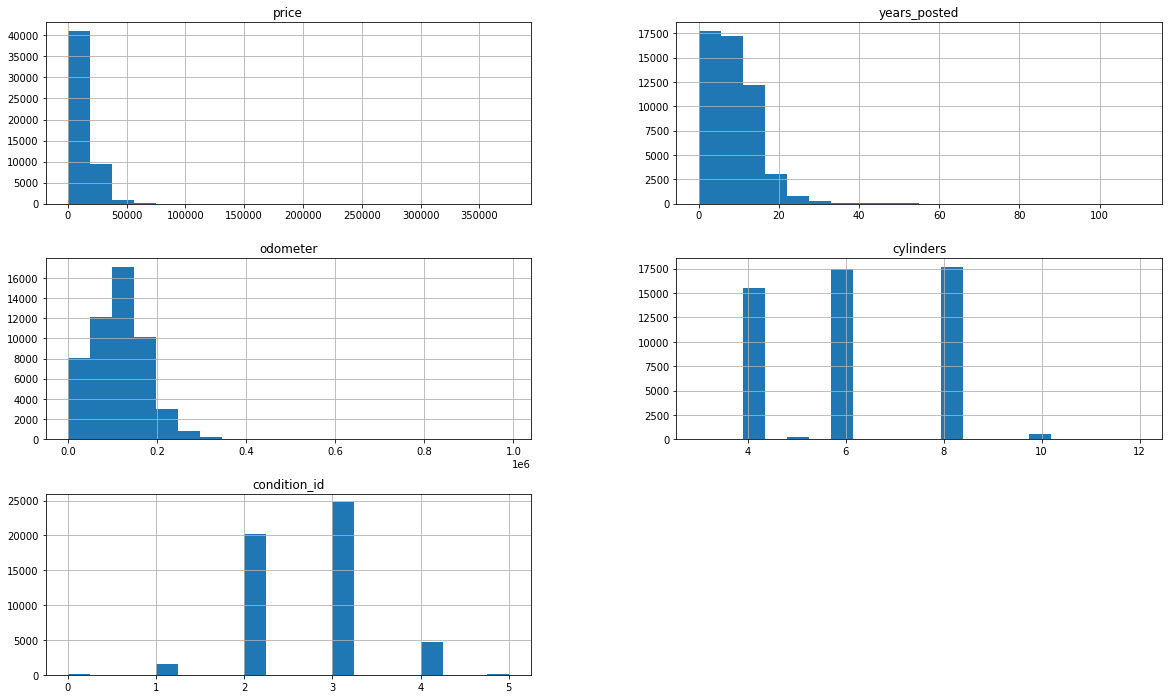

In [ ]:
data.hist(column=['price', 'years_posted','odometer', 'cylinders','condition_id'], figsize=(20,12), bins=20)

Con estos histogramas ya tenemos una visión general sobre nuestros principales parámetros. Ya se puede determinar cuál será el rango de los datos con los que nos interesa trabajar y cuales consideraremos como valores atípicos.

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Correcto pero no olvides sobre el nombre para el grafico

<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> La proxima vez te aconsejo usar zoom

## Estudiar y tratar valores atípicos


**Determinar los límites inferiores para valores atípicos:**
 
En el caso del precio tomaremos un rango de 400 a 70000.

En el caso de los años del vehículo cuando el anunció se colocó tomaremos un rang de 0 a 40.

En el caso de millaje tomaremos un rango de 0 a 30000.

En el caso de el número de cilindros no hay valores atípicos.

En el caso de la condición tampoco hay valores atípicos.

In [ ]:
# Almacenamos los datos sin valores atípicos en un DataFrame separado
frame_sin_atipicos= data.query('500<price<70000 & 0<years_posted<40 & 0<odometer<300000')
frame_sin_atipicos

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,years_posted,average_miles,condition_id
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,black,1,2018-06-23,19,2018,7,20714.285714,2
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2018,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2019,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,white,0,2019-03-22,9,2019,16,10087.312500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2019,2,40451.500000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2018,5,17627.200000,4
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,2018,16,11343.750000,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,2018,9,14222.222222,3
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,2018,5,27914.600000,2


## Estudiar parámetros principales sin valores atípicos

Hacemos una comparación entre los histogramas con valores completos y los que se generan después de haber eliminado los valores atípicos.

<AxesSubplot:>

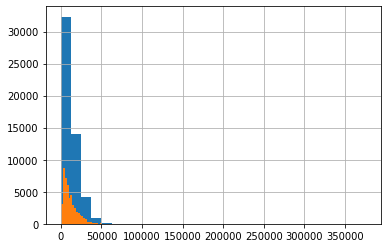

In [ ]:
#Combinación de los histogramas de la columna price

data['price'].hist(bins=30)
frame_sin_atipicos['price'].hist(bins=30)

Aquí se eliminaron todos los datos atipicos más allá de los 70000 que coincide con la última parte visible del histograma azul. 

<AxesSubplot:>

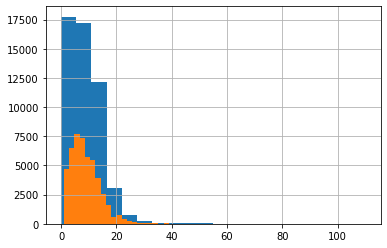

In [ ]:
#Combinación de los histogramas de la columna year_posted

data['years_posted'].hist(bins=20)
frame_sin_atipicos['years_posted'].hist(bins=20)

La cola del segundo histograma coincide con el rango que seleccionamos de 0 a 40 años que es la parte donde terminan los datos normales del primer histograma. 

<AxesSubplot:>

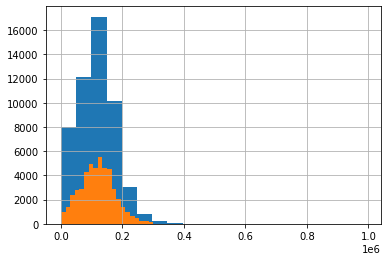

In [ ]:
#Combinación de los histogramas de la columna year_posted

data['odometer'].hist(bins=20)
frame_sin_atipicos['odometer'].hist(bins=20)

El inicio y final del segundo histograma coincide con el rango de los datos normales. 

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Muy bien

## Periodo de colocación de los anuncios


Voy a calcular la media y la mediana de los días que han durado los anuncios. 

In [ ]:
#Veamos un panorama general de la columna
frame_sin_atipicos['days_listed'].describe()

count    47877.000000
mean        39.595275
std         28.229480
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

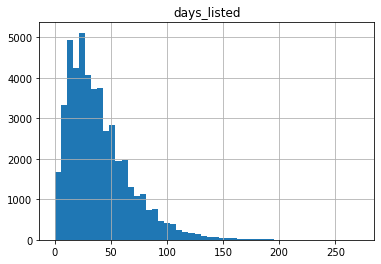

In [ ]:
frame_sin_atipicos.hist('days_listed', bins=50)

La media y la mediana están relativamente cerca. De 25 a 45 días parece ser el tiempo habitual que dura un anuncio.

**Caracteristicas de los carros que se venden más rápido**

In [ ]:
days_listed_fast=frame_sin_atipicos.query('days_listed<=19')


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'years_posted'}>],
       [<AxesSubplot:title={'center':'odometer'}>,
        <AxesSubplot:title={'center':'cylinders'}>],
       [<AxesSubplot:title={'center':'condition_id'}>, <AxesSubplot:>]],
      dtype=object)

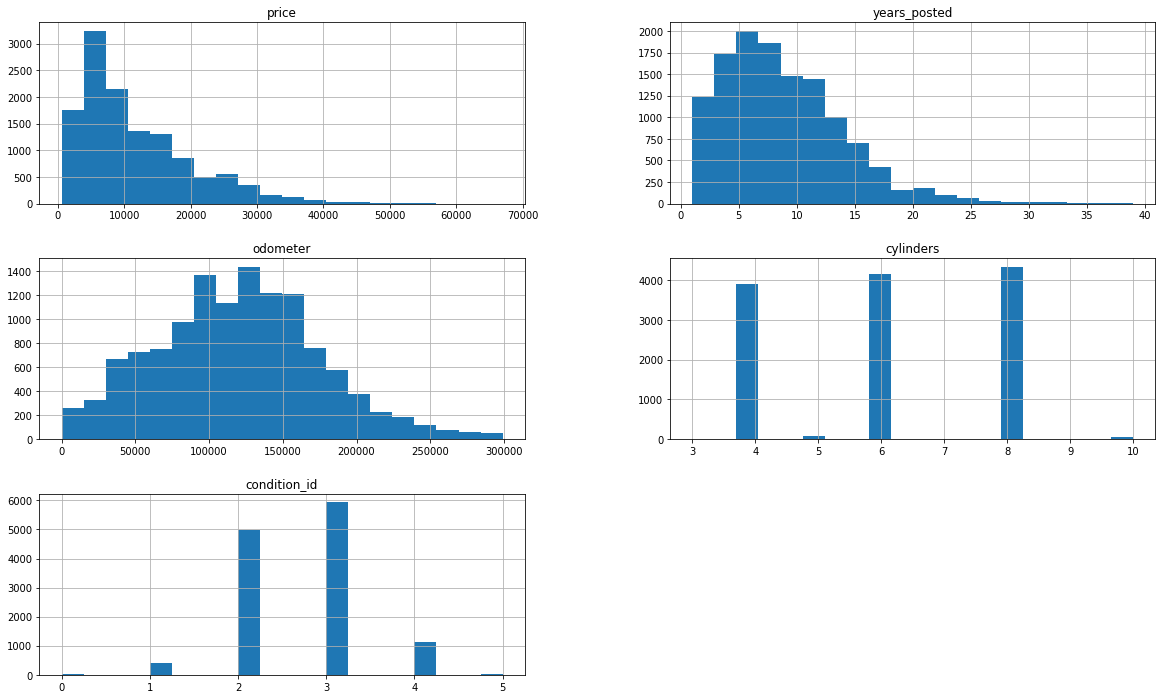

In [ ]:
days_listed_fast.hist(column=['price', 'years_posted','odometer', 'cylinders','condition_id'], figsize=(20,12), bins=20)

**Vamos a ver los carros que están en la media**

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'years_posted'}>],
       [<AxesSubplot:title={'center':'odometer'}>,
        <AxesSubplot:title={'center':'cylinders'}>],
       [<AxesSubplot:title={'center':'condition_id'}>, <AxesSubplot:>]],
      dtype=object)

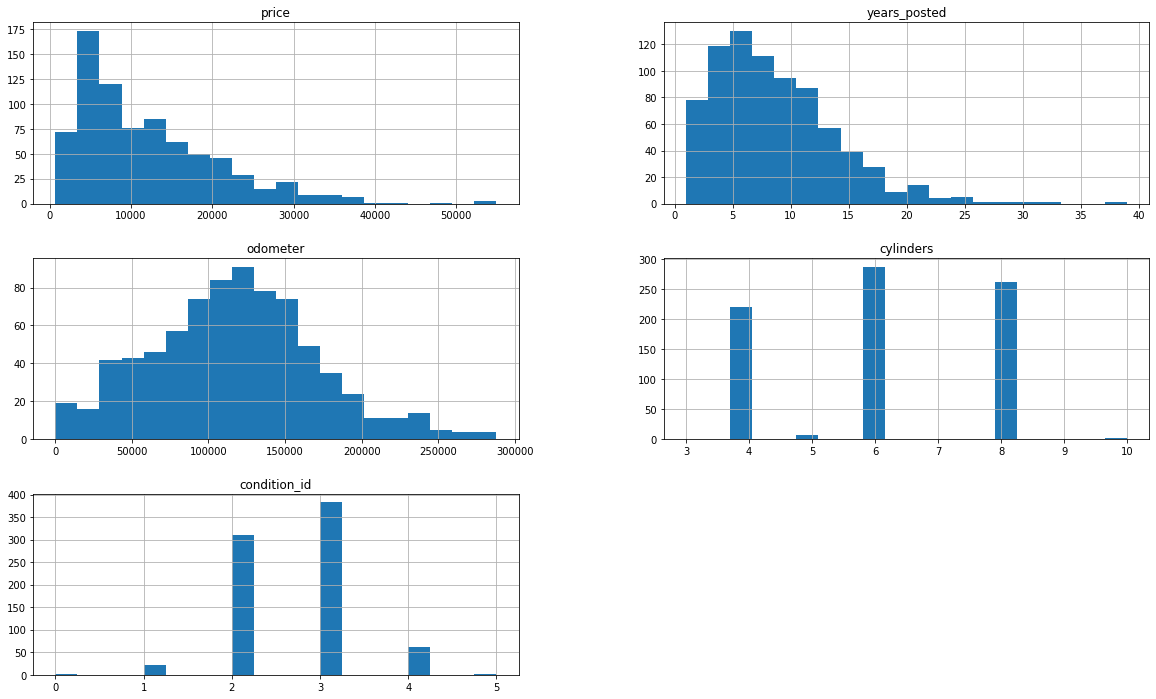

In [ ]:
days_listed_media=frame_sin_atipicos.query('days_listed==33')
days_listed_media.hist(column=['price', 'years_posted','odometer', 'cylinders','condition_id'], figsize=(20,12), bins=20)

**Vamos a ver las características de los carros que se venden más lento**

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'years_posted'}>],
       [<AxesSubplot:title={'center':'odometer'}>,
        <AxesSubplot:title={'center':'cylinders'}>],
       [<AxesSubplot:title={'center':'condition_id'}>, <AxesSubplot:>]],
      dtype=object)

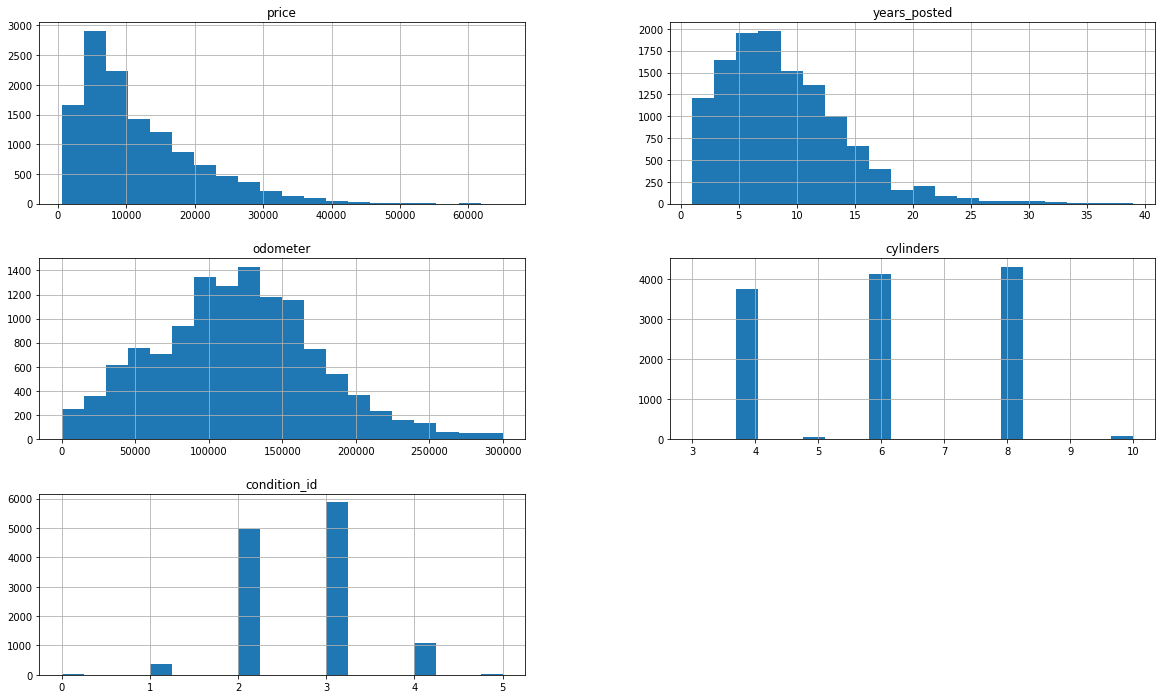

In [ ]:
days_listed_slow=frame_sin_atipicos.query('days_listed>=53')
days_listed_slow.hist(column=['price', 'years_posted','odometer', 'cylinders','condition_id'], figsize=(20,12), bins=20)

**Vamos a ver las características de los anuncios atipicamente largos y atipicamente cortos**

In [ ]:
#Anuncios atipicamente largos
days_listed_super_large=frame_sin_atipicos.query('days_listed>=200')


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'years_posted'}>],
       [<AxesSubplot:title={'center':'odometer'}>,
        <AxesSubplot:title={'center':'cylinders'}>],
       [<AxesSubplot:title={'center':'condition_id'}>, <AxesSubplot:>]],
      dtype=object)

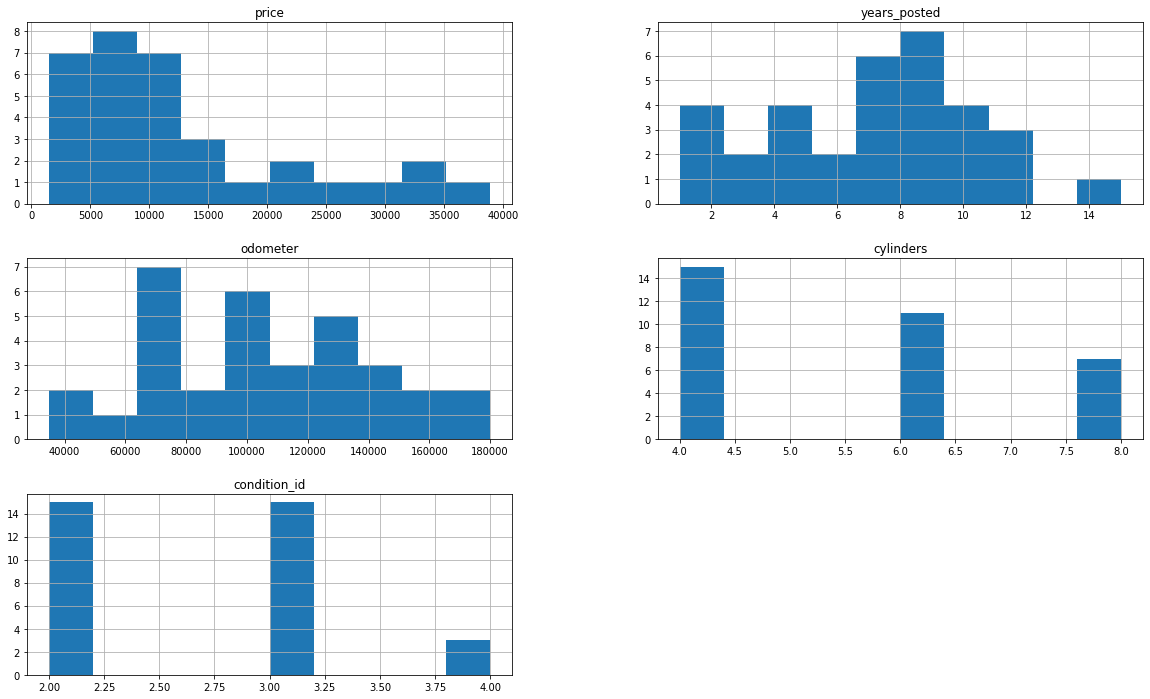

In [ ]:
days_listed_super_large.hist(column=['price', 'years_posted','odometer', 'cylinders','condition_id'], figsize=(20,12), bins=10)

In [ ]:
#Anuncios atipicamente cortos
days_listed_super_short=frame_sin_atipicos.query('days_listed==0')


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'years_posted'}>],
       [<AxesSubplot:title={'center':'odometer'}>,
        <AxesSubplot:title={'center':'cylinders'}>],
       [<AxesSubplot:title={'center':'condition_id'}>, <AxesSubplot:>]],
      dtype=object)

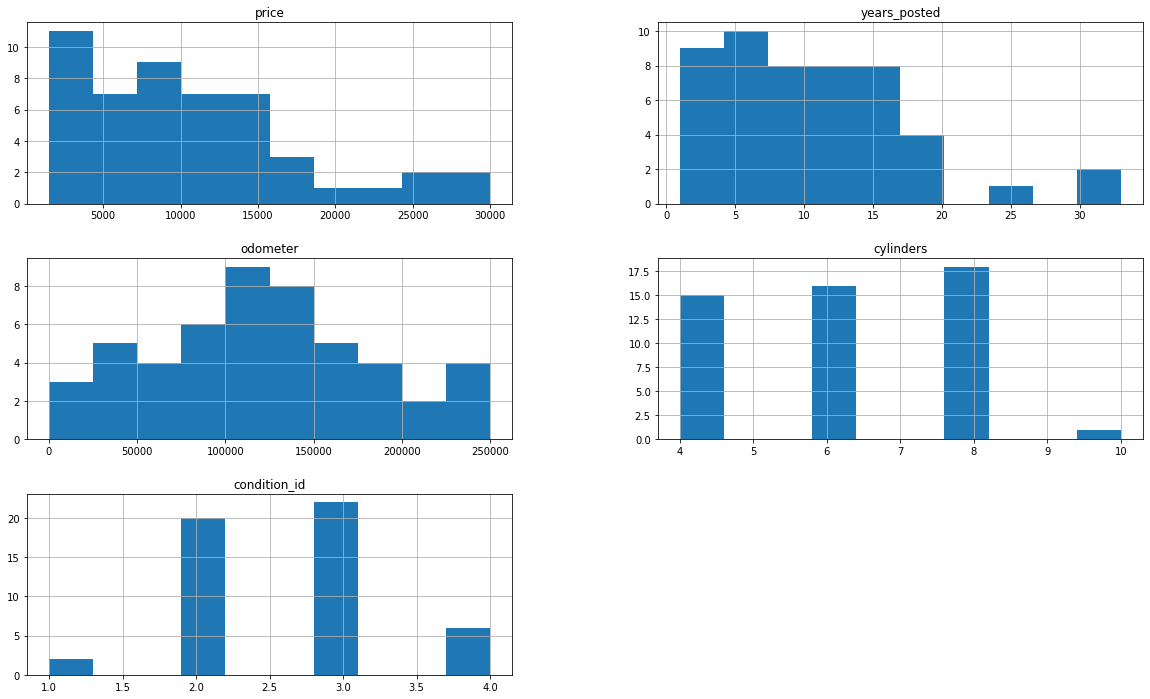

In [ ]:
days_listed_super_short.hist(column=['price', 'years_posted','odometer', 'cylinders','condition_id'], figsize=(20,12), bins=10)

**Conclusiones de la duración de los anuncios**

Por el momento no se encontraron alguna característica especifica en los anuncios que duran más tiempo o menos tiempo, más allá de la cantidad de vehiculos que existen de cada categoría. 


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Bien pero tambien podemos hacer mas conclusiones de esa patre

## Precio promedio por cada tipo de vehículo

[Analiza el número de anuncios y el precio promedio para cada tipo de vehículo. Traza un gráfico mostrando la dependencia de la cantidad de anuncios en cada tipo de vehículo. Selecciona los dos tipos con un mayor número de anuncios.]

In [ ]:
frame_corr_scatter_pivot = frame_sin_atipicos.pivot_table(index='type', values='price', aggfunc=['mean','count'])
frame_corr_scatter_pivot.columns=['price_mean', 'ad_count']
frame_corr_scatter_pivot

,price_mean,ad_count
type,,
SUV,10842.737470,11652
bus,17135.666667,24
convertible,13398.601504,399
coupe,13933.687904,2009
hatchback,6848.856855,992
mini-van,7758.114871,1123
offroad,14057.893204,206
other,10522.548936,235
pickup,15216.496174,6403


In [ ]:
frame_corr_scatter_pivot.corr()
#frame_corr_scatter_pivot['price_mean'].corr(frame_corr_scatter_pivot['ad_count'])

,price_mean,ad_count
price_mean,1.000000,-0.004138
ad_count,-0.004138,1.000000


<AxesSubplot:xlabel='price_mean', ylabel='ad_count'>

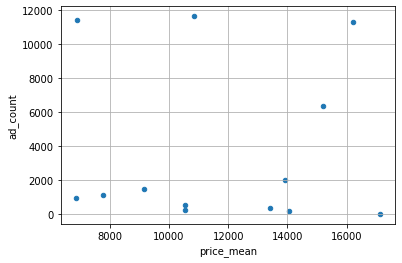

In [ ]:
frame_corr_scatter_pivot.plot(x='price_mean', y='ad_count', kind='scatter', grid=True)

**Conclusión sobre el precio y la cantidad de anuncios**

No hay una relación clara entre el número de anuncios y el precio de cada tipo de vehiculo. 

## Factores de precio

Voy a investigar cuales son las características que más impactan sobre el precio. Tomaré los dos tipos de vehículos más populares detectados en la sección anterior (SUV y sedad) y estudiaré si el precio depende de la edad, el millaje, la condición, tipo de transmisión o color. Para las variables categorícas realizaré gráficos de caja y bigotes, para el resto utilizaré gráficos de dispersión. 

**Matriz de correlación**

In [ ]:
#Solo tomamos en cuenta los dos tipos con más anuncios de la sección anterior
frame_corr_suv_se=frame_sin_atipicos.query('type in ("SUV","sedan")')
frame_corr_suv_se.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,date_posted_year,years_posted,average_miles,condition_id
price,1.000000,0.526972,0.215301,-0.504856,0.302758,-0.006038,0.023636,-0.523630,0.243892,0.260281
model_year,0.526972,1.000000,-0.260721,-0.593775,-0.117130,-0.008023,0.027837,-0.995305,0.544206,0.284569
cylinders,0.215301,-0.260721,1.000000,0.219306,0.420000,0.011468,-0.003578,0.259853,-0.116506,-0.072395
odometer,-0.504856,-0.593775,0.219306,1.000000,0.086226,0.008284,-0.024159,0.590249,0.014050,-0.308785
is_4wd,0.302758,-0.117130,0.420000,0.086226,1.000000,0.003700,-0.001728,0.116728,-0.037163,-0.009481
days_listed,-0.006038,-0.008023,0.011468,0.008284,0.003700,1.000000,0.001722,0.008173,-0.008343,-0.013107
date_posted_year,0.023636,0.027837,-0.003578,-0.024159,-0.001728,0.001722,1.000000,0.069048,-0.134113,0.013752
years_posted,-0.523630,-0.995305,0.259853,0.590249,0.116728,0.008173,0.069048,1.000000,-0.556104,-0.282668
average_miles,0.243892,0.544206,-0.116506,0.014050,-0.037163,-0.008343,-0.134113,-0.556104,1.000000,0.064940
condition_id,0.260281,0.284569,-0.072395,-0.308785,-0.009481,-0.013107,0.013752,-0.282668,0.064940,1.000000


¿Hay una correlación entre los años y el precio de cada tipo de vehículo? Sí hay una relación inversa. A menor cantidad de años del vehículo mayor es su precio

In [ ]:
frame_years_posted_con.head()

NameError: name 'frame_years_posted_con' is not defined

In [ ]:
frame_years_posted_con = frame_corr_suv_se.pivot_table(index='years_posted', columns='type', values='price')
frame_years_posted_con.plot(style="o") 

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Que bonito! Buen trabajo!

Correlación entre el millaje y el precio por tipo de vehículo. En este caso también se muestra una relación inversa, entre mayor es el millaje de un carro menor es un costo, entre menor sea su millaje mayor es su costo. 

In [ ]:
frame_odometer_con = frame_corr_suv_se.pivot_table(index='odometer', columns='type', values='price')
frame_odometer_con.plot(style="o", figsize=(14,8), ms=4) 

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Genial que mustras asi

Correlación entre la condición y el precio. Aquí también hay una relación, entre mejor es la condición del carro mayor es su precio. 

In [ ]:
frame_condition_con = frame_corr_suv_se.pivot_table(index='condition_id', columns='type', values='price')
frame_condition_con.plot(style="o") 

Correlación entre el tipo de transmisión y el precio. Aquí no parece haber una relación fuerte entre el tipo de transmisión y el precio del carro.  

In [ ]:
frame_corr_suv_se

In [ ]:
for tipo, datos in frame_corr_suv_se.groupby('type'):
    datos.boxplot(by='transmission', column='price', figsize=(15,8))
    plt.title(tipo)
    plt.show()

Correlación entre el color y el precio del auto. Aquí tampoco parece haber una relación tan fuerte entre el color y el precio del auto. 

In [ ]:
for tipo, datos in frame_corr_suv_se.groupby('type'):
    datos.boxplot(by='paint_color', column='price', figsize=(15,8))
    plt.title(tipo)
    plt.show()

## Conclusión general

* Se rellenaron los valores ausentes dependiendo la característica. Para los valores categoricos usé la moda ya que no es posible usar la mediana o media.
* En otro tipo de datos como los booleanos se utilizo la función fillna
* Hice un DataFrame nuevo para separar los valores atípicos del DataFrame original. 
* Los factores que más afectan el precio de un vehículo son el millaje, sus años de antigüedad y la condición en la que se encuentra. 
* El color y el tipo de transmisión parecen no tener una clara afectación al precio. 

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Muchas gracias por el trabajo realizado. Tienes el proyecto exelente y está claro que lo estás intentando. Te pido que en futuro agregues los nombres para tus graficos en los proyectos, es muy importante en el trabajo de analista de datos. De lo contrario, todo está bien, estoy lista para aceptar el proyecto :)